#### LadderNet training

In [1]:
# Standard
import os
import sys
import datetime
import numpy as np
import matplotlib.pyplot as plt

# Utils
import h5py

# Deep Learning
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

# User defined
sys.path.insert(0, "../")
from architectures.laddernet import LadderNet
from architectures.unet import UNet
from metrics.multiclass_dice import multiclass_dice

2022-09-20 22:37:07.545487: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-20 22:37:07.979932: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-20 22:37:08.808547: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/lars/miniconda3/envs/ai4mi/lib/
2022-09-20 22:37:08.808614: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plug

In [3]:
f = h5py.File("../data/image_dataset.hdf5", "r")
# print(type(f["train 2ch frames"][:,:,:,:]))

<class 'numpy.ndarray'>


In [16]:
frames2ch = np.append(f["train 2ch frames"][:,:,:,:], f["train 4ch frames"][:,:,:,:], axis=0)
masks2ch = np.append(f["train 2ch masks"][:,:,:,:], f["train 4ch masks"][:,:,:,:], axis=0)

In [17]:
print(frames2ch.shape)

(1800, 384, 384, 1)


In [18]:
train_frames, test_frames, train_masks, test_masks = train_test_split(frames2ch, masks2ch)

In [19]:
model_laddernet = LadderNet(input_size=(384, 384, 1), num_classes=4, filters=20)
model_unet = UNet(input_size=(384, 384, 1), depth=5, num_classes=4, filters=10, batch_norm=True)

In [20]:
earlystop = EarlyStopping(monitor='val_multiclass_dice', min_delta=0, patience=5,
                          verbose=1, mode="max", restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor='val_multiclass_dice', factor=0.2, patience=2,
                              verbose=1, mode="max", min_lr=1e-5)

In [21]:
model_laddernet.compile(optimizer=Adam(lr=1e-3), loss="sparse_categorical_crossentropy", metrics=[multiclass_dice, "accuracy"])

#### Now we are ready to train our DNN model!

In [22]:
model_laddernet.fit(x=train_frames,
                    y=train_masks,
                    validation_data=[test_frames, test_masks],
                    batch_size=5,
                    epochs=150,
                    callbacks=[earlystop, reduce_lr])

Epoch 1/150


2022-09-20 22:39:42.957346: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-09-20 22:39:44.190250: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-20 22:39:44.235390: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-20 22:39:44.235434: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-09-20 22:39:44.283771: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-20 22:39:44.283865: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


270/270 [==============================] - 66s 220ms/step - loss: 0.7201 - multiclass_dice: 0.4496 - accuracy: 0.7707 - val_loss: 1.1389 - val_multiclass_dice: 0.5498 - val_accuracy: 0.7899 - lr: 0.0010
Epoch 2/150
270/270 [==============================] - 58s 216ms/step - loss: 0.2979 - multiclass_dice: 0.6755 - accuracy: 0.8886 - val_loss: 0.3712 - val_multiclass_dice: 0.6322 - val_accuracy: 0.8722 - lr: 0.0010
Epoch 3/150
270/270 [==============================] - 61s 225ms/step - loss: 0.2495 - multiclass_dice: 0.7146 - accuracy: 0.9022 - val_loss: 0.2412 - val_multiclass_dice: 0.7362 - val_accuracy: 0.9042 - lr: 0.0010
Epoch 4/150
270/270 [==============================] - 63s 234ms/step - loss: 0.2264 - multiclass_dice: 0.7384 - accuracy: 0.9103 - val_loss: 0.3869 - val_multiclass_dice: 0.7019 - val_accuracy: 0.8714 - lr: 0.0010
Epoch 5/150
270/270 [==============================] - 62s 229ms/step - loss: 0.2113 - multiclass_dice: 0.7542 - accuracy: 0.9154 - val_loss: 0.2291 - v

Epoch 36/150
270/270 [==============================] - 57s 212ms/step - loss: 0.1495 - multiclass_dice: 0.8157 - accuracy: 0.9373 - val_loss: 0.1631 - val_multiclass_dice: 0.8014 - val_accuracy: 0.9319 - lr: 1.0000e-05
Epoch 37/150
270/270 [==============================] - 57s 213ms/step - loss: 0.1499 - multiclass_dice: 0.8152 - accuracy: 0.9372 - val_loss: 0.1629 - val_multiclass_dice: 0.8015 - val_accuracy: 0.9319 - lr: 1.0000e-05
Epoch 38/150
270/270 [==============================] - 58s 214ms/step - loss: 0.1491 - multiclass_dice: 0.8158 - accuracy: 0.9373 - val_loss: 0.1639 - val_multiclass_dice: 0.8007 - val_accuracy: 0.9318 - lr: 1.0000e-05
Epoch 38: early stopping


In [36]:
model_unet.compile(optimizer=Adam(lr=1e-3), loss="sparse_categorical_crossentropy", metrics=[multiclass_dice, "accuracy"])

In [37]:
model_unet.fit(x=train_frames,
                    y=train_masks,
                    validation_data=[test_frames, test_masks],
                    batch_size=5,
                    epochs=150,
                    callbacks=[earlystop, reduce_lr])

Epoch 1/150
270/270 [==============================] - 22s 62ms/step - loss: 0.6947 - multiclass_dice: 0.7229 - accuracy: 0.8829 - val_loss: 1.2033 - val_multiclass_dice: 0.3944 - val_accuracy: 0.6776 - lr: 0.0010
Epoch 2/150
270/270 [==============================] - 15s 55ms/step - loss: 0.4506 - multiclass_dice: 0.7832 - accuracy: 0.9226 - val_loss: 0.5918 - val_multiclass_dice: 0.7269 - val_accuracy: 0.8800 - lr: 0.0010
Epoch 3/150
270/270 [==============================] - 15s 56ms/step - loss: 0.3457 - multiclass_dice: 0.7936 - accuracy: 0.9277 - val_loss: 0.3385 - val_multiclass_dice: 0.7813 - val_accuracy: 0.9182 - lr: 0.0010
Epoch 4/150
270/270 [==============================] - 15s 57ms/step - loss: 0.2803 - multiclass_dice: 0.8031 - accuracy: 0.9318 - val_loss: 0.3435 - val_multiclass_dice: 0.7622 - val_accuracy: 0.9064 - lr: 0.0010
Epoch 5/150
270/270 [==============================] - 15s 55ms/step - loss: 0.2452 - multiclass_dice: 0.8056 - accuracy: 0.9328 - val_loss: 0.2

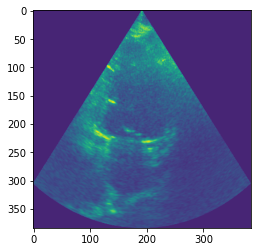

In [38]:
plt.imshow(train_frames[0,:,:,0])

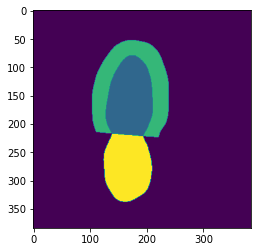

In [39]:
plt.imshow(train_masks[0,:,:,0])

In [40]:
prediction = model_laddernet.predict(train_frames[:1,:,:,:])

1/1 [==============================] - 0s 18ms/step


In [41]:
prediction_u = model_unet.predict(train_frames[:1,:,:,:])

1/1 [==============================] - 1s 539ms/step


In [42]:
prediction = prediction.reshape([384, 384, 4])
prediction_u = prediction_u.reshape([384, 384, 4])
prediction.shape

(384, 384, 4)

In [43]:
import tensorflow as tf

In [44]:
y = tf.convert_to_tensor(prediction)
y_u = tf.convert_to_tensor(prediction_u)

In [45]:
z = tf.math.argmax(prediction, axis = 2)
z_u = tf.math.argmax(prediction_u, axis = 2)

#### Prediction visualization

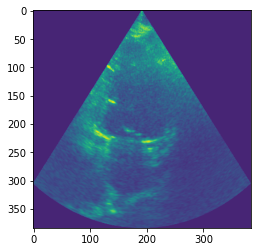

In [46]:
plt.imshow(train_frames[0,:,:,0])

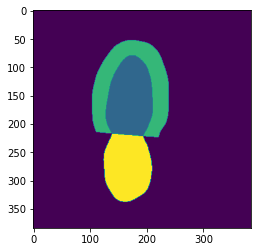

In [47]:
plt.imshow(train_masks[0,:,:,0])

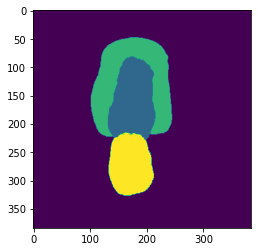

In [48]:
plt.imshow(z[:,:])
plt.show()

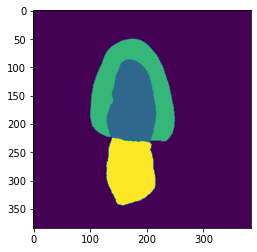

In [49]:
plt.imshow(z_u[:,:])
plt.show()

#### Model weights storage

In [50]:
model_laddernet.save_weights("../models/ladder088_2ch.h5")

In [51]:
model_unet.save_weights("../models/unet.h5")